In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


{'Abu Dahbi': 0, 'Ajman': 1, 'Dubai': 2, 'Fujairah': 3}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

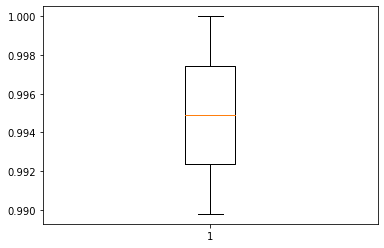

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


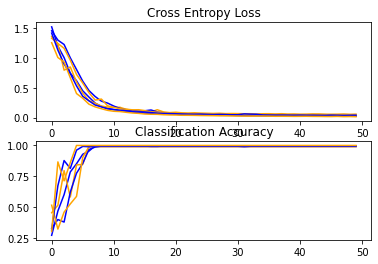

In [1]:
#@title Default title text
copied_path = r'/content/drive/MyDrive/DL'

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import random
import cv2
from PIL import Image
from numpy import mean
from numpy import std
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
#import visualkeras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import random as rn
from keras import backend as K



def create_dataset_PIL(img_folder):
    IMG_HEIGHT=55
    IMG_WIDTH= 250
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)

    return img_data_array , class_name




def initialize_nn_seed(seed):
    np.random.seed(seed)
    rn.seed(seed)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    tf.random.set_seed(seed)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    K.set_session(sess)    



def create_model(seed):
    initialize_nn_seed(seed) 
    kfold = KFold(3, shuffle=True, random_state=seed)
        # enumerate splits
    for train_ix, test_ix in kfold.split(train_x):
        # define model
        model = Sequential()
        model.add(Conv2D(36, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(55, 250, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(30, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(55, 250, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(90, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(4, activation='softmax'))
        # compile model
        opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum =0.9)
        model.compile(optimizer=opt ,loss = 'categorical_crossentropy', metrics=['accuracy'])
        #model.summary()
        # select rows for train and test
        trainX, trainY, testX, testY = train_x[train_ix], train_y[train_ix], train_x[test_ix], train_y[test_ix]
        # fit model
        history = model.fit(trainX,trainY, epochs=50,batch_size=32, validation_data=(testX, testY))
        histories.append(history)
        #evaluate model
        _, acc = model.evaluate(testX, testY)
        print(' > %.5f' %  (acc * 100.0))
        scores.append(acc)
        predict_x = np.argmax(model.predict(trainX), axis=1)
        classes_x =  np.argmax(predict_x,axis=-1)
        predict_x = predict_x.flatten()
        classes_x = classes_x.flatten()
        trainY = np.argmax(trainY, axis=1)
        predict = np.argmax(model.predict(testX), axis=1)
        classes =  np.argmax(predict,axis=-1)
        testY = np.argmax(testY, axis=1)
        
        predict = predict.flatten()
        classes= classes.flatten()
        accuracy = accuracy_score(trainY, predict_x)
        print('Accuracy train: %f' % accuracy)
        accuracy1 = accuracy_score(testY, predict)
        print('Accuracy test: %f' % accuracy1)

        precision = precision_score(trainY, predict_x,labels=np.unique(predict_x), average='micro')
        print('Precision train: %f' % precision)
        precision1 = precision_score(testY, predict,labels=np.unique(predict), average='micro')
        print('Precision test: %f' % precision1)

        recall = recall_score(trainY, predict_x,labels=np.unique(predict_x), average='micro')
        print('Recall train: %f' % recall)
        recall1 = recall_score(testY, predict,labels=np.unique(predict), average='micro')
        print('Recall test: %f' % recall1)

        f1 = f1_score(trainY, predict_x,labels=np.unique(predict_x), average='micro')
        print('F1 score train: %f' % f1)
        f11 = f1_score(testY, predict,labels=np.unique(predict), average='micro')
        print('F1 score test: %f' % f11)
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()
    for i in range(len(histories)):
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    #visualkeras.layered_view(model, to_file='output.png').show() # write and show

        

  
os.environ['PYTHONHASHSEED'] = '0'
SEED = 1
np.random.seed(SEED)
rn.seed(SEED)
PIL_img_data, class_name=create_dataset_PIL(copied_path)
target_dict={k: v for v, k in enumerate(np.unique(class_name))}

print(target_dict)
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

print(target_val)
histories = list()
scores = list()
x=np.array(PIL_img_data, np.float32)
y=np.array(list(map(int,target_val)), np.float32)

import keras
train_x, test_x, train_y, test_y = train_test_split(x, y,train_size=0.7, test_size=0.3, random_state=SEED)
train_x = train_x.reshape((train_x.shape[0], 55, 250, 3))
test_x = test_x.reshape((test_x.shape[0], 55, 250, 3))
train_y = keras.utils.np_utils.to_categorical(train_y)
test_y = keras.utils.np_utils.to_categorical(test_y)


model = create_model(seed=123456)

